<h1>Twitter Sentiment Analysis</h1>

***

<h2>Natural Language Processing (NLP)</h2>


## LIBS

In [31]:
import pandas as pd
import numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

import re

import nltk
nltk.download('stopwords')
nltk.download('rslp')

from wordcloud import WordCloud

from sklearn.model_selection import train_test_split


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/daianeklein/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     /Users/daianeklein/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


<h2>Functions</h2>

In [32]:
def apply_stammer(text):
    sentences_stemmer = []
    stemmer = nltk.stem.RSLPStemmer()

    # Defining regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern       = '@[^\s]+'
    alphaPattern      = "[^a-zA-Z0-9]"
    sequencePattern   = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in text:
        tweet = tweet.lower()

        # Replace all URls with 'URL'
        tweet = re.sub(urlPattern,' URL',tweet)
        # Replace all emojis.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])        
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(userPattern,' USER', tweet)        
        # Replace all non alphabets.
        tweet = re.sub(alphaPattern, " ", tweet)
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweet_words = ''
        for word in tweet.split():
            if len(word) > 1:
                word = stemmer.stem(word)
                tweet_words += (word + ' ')

        sentences_stemmer.append(tweet_words)
            #not_stemmer = [str(stemmer.stem(p)) for p in tweet.split() if p not in stop_words_nltk]
            #sentences_stemmer.append((not_stemmer))

    return sentences_stemmer

In [33]:
# target columns
df_columns = ["sentiment", "ids", "date", "flag", "user", "text"]
df_raw = pd.read_csv('data/twitter-data.csv',
                    encoding = 'latin-1',
                    names = df_columns)

df_raw.head()

,sentiment,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## Dataset analysis

In [34]:
df1 = df_raw.copy()

In [35]:
df1 = df1.sample(1000)

In [36]:
df1.describe()

,sentiment,ids
count,1000.000000,1.000000e+03
mean,2.012000,2.009052e+09
std,2.000965,1.862835e+08
min,0.000000,1.467971e+09
25%,0.000000,1.967358e+09
50%,4.000000,2.007202e+09
75%,4.000000,2.177619e+09
max,4.000000,2.328856e+09


In [37]:
df1.isnull().sum()

sentiment    0
ids          0
date         0
flag         0
user         0
text         0
dtype: int64

In [38]:
#target variable
df1['sentiment'].value_counts()

4    503
0    497
Name: sentiment, dtype: int64

In [39]:
df1['sentiment'] = df1['sentiment'].replace(4, 1)
#target variable
df1['sentiment'].value_counts()

1    503
0    497
Name: sentiment, dtype: int64

In [40]:
(df1[df1['sentiment'] == 1].sample(3))


,sentiment,ids,date,flag,user,text
1480921,1,2066972173,Sun Jun 07 11:30:45 PDT 2009,NO_QUERY,UrbanNicole,1130 followers! I love all my amazing followe...
1197199,1,1984934081,Sun May 31 16:05:48 PDT 2009,NO_QUERY,allaboutcricket,@gypsyroadhog I'm favoring Vampire...............
1354789,1,2047298386,Fri Jun 05 13:26:41 PDT 2009,NO_QUERY,danaseverance,@Ben373 Heh. I do work all the time. Thankfull...


In [41]:
(df1[df1['sentiment'] == 0].sample(3))

,sentiment,ids,date,flag,user,text
209134,0,1973894799,Sat May 30 12:02:31 PDT 2009,NO_QUERY,StarOfSavannah,My cat is attacking my feet. Even he can't be...
526850,0,2194415887,Tue Jun 16 09:45:55 PDT 2009,NO_QUERY,flapjacks9702,"and to top it off, i couldn't talk to you guys..."
133752,0,1836079349,Mon May 18 07:19:52 PDT 2009,NO_QUERY,Nick7782,@rebeccao372 oh dear xx she not well?


In [42]:
# target columns
df1 = df1[['sentiment','text']]

<h2>Pre-Processing Text</h2>

In [43]:
df2 = df1.copy()

In [44]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}


In [45]:
# removing stop words
stop_words_nltk = nltk.corpus.stopwords.words('english')

stop_words_nltk[0:10]


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [46]:
#checking the function
df2_sample = df2.sample(10, random_state=  39 )
apply_stammer(df2_sample['text'].tolist())

['headach off to bed ',
 'ha just knocked off am going hom yay ',
 'wish wa with us us us and us ',
 'rushing to the hospit sist in lab tyson is on the way ',
 'hom from us im soo tired it us fault for waking me up need to study for fashion ',
 'us sound good hav som thing to chat with you about know you had bad weekend sorry to he that tty ',
 'us it wa okay she talked the whol tim we didnt get to do an experiment ',
 'us good day wa working but alway out and about with work anyway so got to enjoy the sunshin for bit ',
 'wok up feelin not so much lik money gettin in the show keepin it fr3 ',
 'feel bad for the us eleva he alway working ']

In [47]:
df2 = apply_stammer(df2['text'].tolist())

### Data visualization

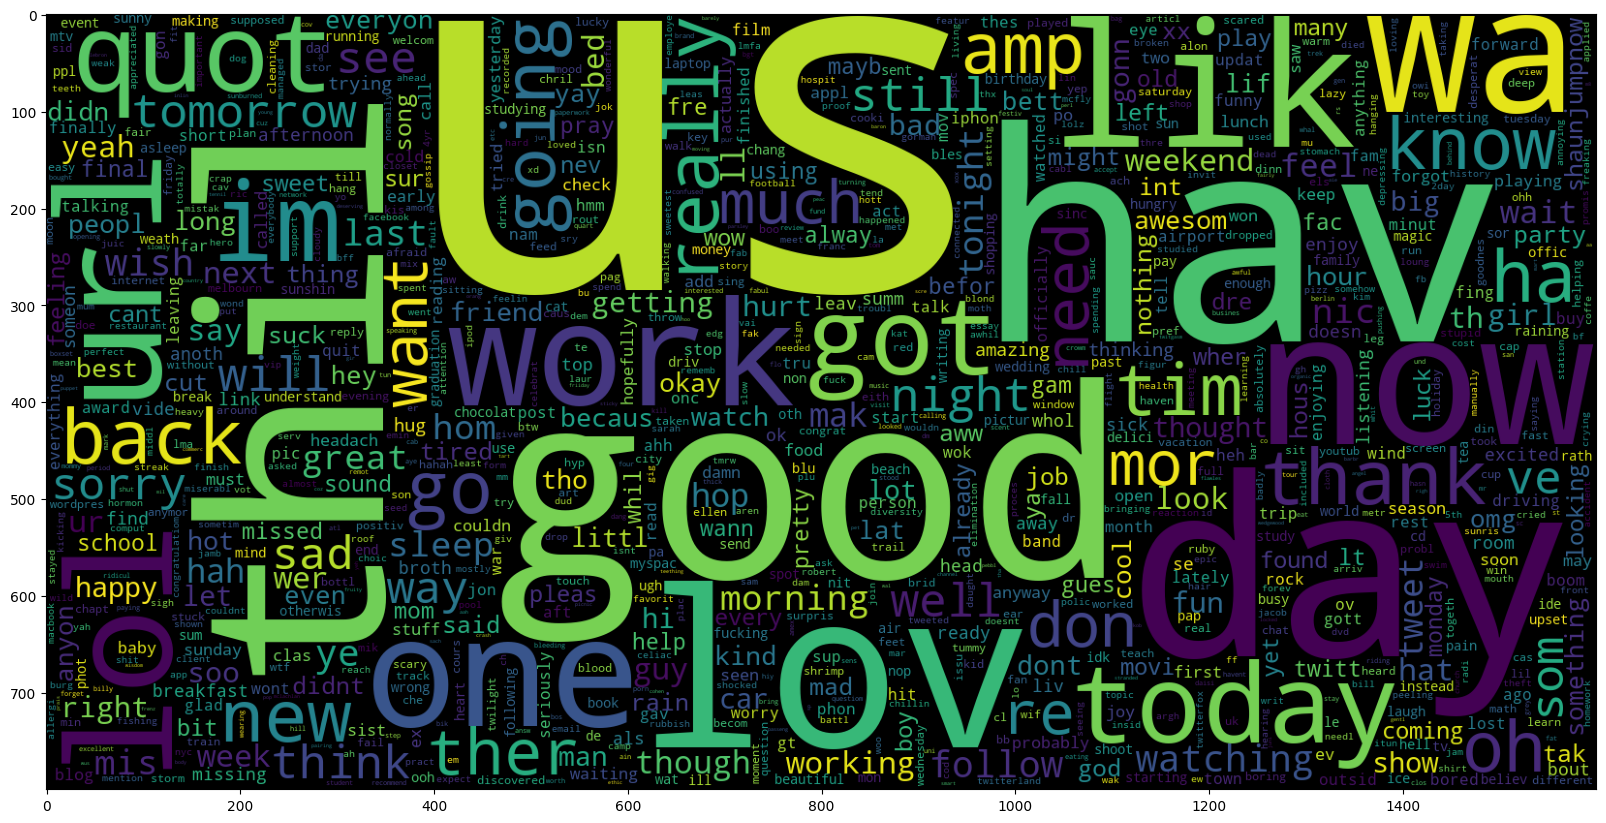

In [48]:

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(df2))
plt.imshow(wc)

### Logistic Regressions

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

In [61]:
X_train, X_test, y_train, y_test = train_test_split(df2, df1['sentiment'].tolist(),
                                                    test_size = 0.05, random_state = 0)
print(f'Data Split done.')

Data Split done.


### TF-IDF

In [63]:
vectorized = TfidfVectorizer(ngram_range=(1, 2), max_features=1000)
vectorized.fit(X_train)

print(vectorized)

TfidfVectorizer(max_features=1000, ngram_range=(1, 2))


In [64]:
X_train = vectorized.transform(X_train)
X_test  = vectorized.transform(X_test)

In [69]:
print(X_train)

  (0, 839)	0.06554996574572687
  (0, 837)	0.40237190217321883
  (0, 781)	0.08644318379846799
  (0, 720)	0.2423252603996815
  (0, 675)	0.1722326084944384
  (0, 657)	0.2423252603996815
  (0, 583)	0.2423252603996815
  (0, 556)	0.12532087831583769
  (0, 530)	0.13568434090107262
  (0, 346)	0.23396929016939955
  (0, 328)	0.2423252603996815
  (0, 102)	0.22136954450807736
  (0, 101)	0.21636924611268496
  (0, 48)	0.22136954450807736
  (0, 38)	0.506195959321205
  (0, 31)	0.20979601719444418
  (0, 3)	0.16687396656933093
  (1, 964)	0.21181066867632492
  (1, 800)	0.30567500296900585
  (1, 781)	0.1193638471044642
  (1, 737)	0.12017496374900007
  (1, 670)	0.3346114067169479
  (1, 666)	0.17304756142674513
  (1, 536)	0.3346114067169479
  (1, 534)	0.2009990282371947
  :	:
  (947, 542)	0.242030038469256
  (947, 537)	0.15703411492453095
  (947, 519)	0.24481515156891004
  (947, 490)	0.28154359765257403
  (947, 456)	0.2880500768536061
  (947, 392)	0.31531803544525716
  (947, 391)	0.18176727814003857
  (947,

In [70]:
lr = LogisticRegression(random_state = 1)
print(lr)

LogisticRegression(random_state=1)


In [71]:
lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [72]:
y_pred_test = lr.predict(X_test)

y_pred_test

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1])

### Accuracy

In [73]:
from sklearn.metrics import accuracy_score


In [74]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.7200
